In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score,ConfusionMatrixDisplay
import  seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/purni/Downloads/Admission_Predict.csv")
df

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.columns

Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.isnull().sum()

Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [7]:
df=df.drop(['Serial_No.'],axis=1)


In [8]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
pd.DataFrame([[i,len(df[i].unique())]for i in df.columns],columns=['Variable','Unique']).set_index("Variable")

,Unique
Variable,
GRE_Score,49
TOEFL_Score,29
University_Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance_of_Admit,61


In [10]:
df.GRE_Score.sort_values()

377    290
117    290
168    293
79     294
272    294
      ... 
81     340
84     340
143    340
384    340
429    340
Name: GRE_Score, Length: 500, dtype: int64

In [11]:
df.TOEFL_Score.sort_values()

368     92
28      93
79      93
411     94
347     94
      ... 
81     120
97     120
297    120
143    120
497    120
Name: TOEFL_Score, Length: 500, dtype: int64

DATA VISUALIZATION

<AxesSubplot:>

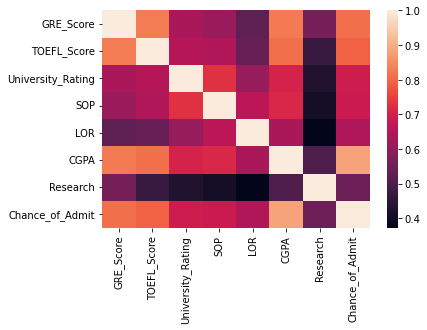

In [12]:
sns.heatmap(df.corr())


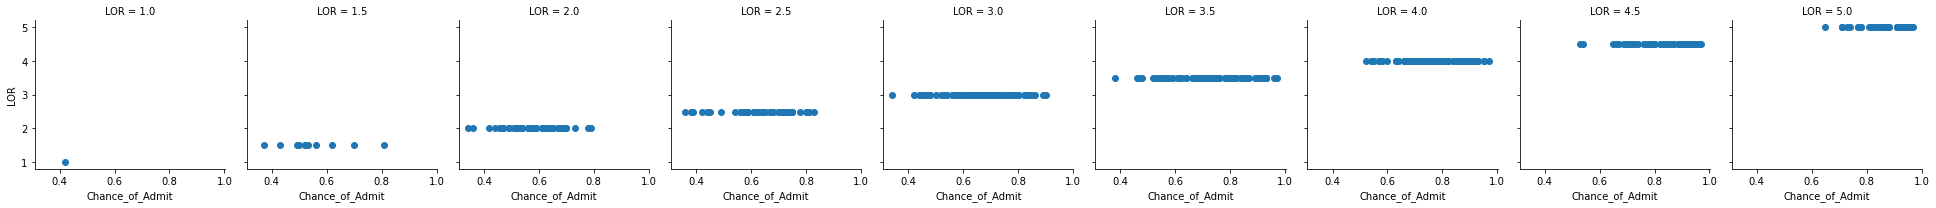

In [13]:
graph=sns.FacetGrid(df,col="LOR")
graph.map(plt.scatter,"Chance_of_Admit","LOR")

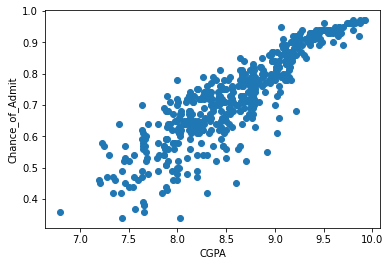

In [14]:
plt.scatter(df.CGPA,df.Chance_of_Admit)
plt.xlabel("CGPA")
plt.ylabel("Chance_of_Admit")
plt.show()

MODEL PREPARATION

In [15]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [16]:
df['Chance_of_Admit']=df['Chance_of_Admit'].apply(lambda x: 1 if x>0.5 else 0)

In [17]:
df


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,1


In [18]:
x=df.drop(['Chance_of_Admit'],axis=1)
x

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [19]:
y=df['Chance_of_Admit']
y

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Chance_of_Admit, Length: 500, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y, random_state = 0)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 7), (100, 7), (400,), (100,))

  <h3>LOGISTIC REGRESSION</h3>

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
lr_matrix= confusion_matrix(y_test,lr_predict)
print("Confusion Matrix\n")
print(lr_matrix)

print("Accuracy Score",(accuracy_score(y_test,lr_predict))*100)
print("Classification Report:\n")
print(classification_report(y_test,lr_predict))

Confusion Matrix

[[ 1  7]
 [ 1 91]]
Accuracy Score 92.0
Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.93      0.99      0.96        92

    accuracy                           0.92       100
   macro avg       0.71      0.56      0.58       100
weighted avg       0.89      0.92      0.90       100



C:\Users\purni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


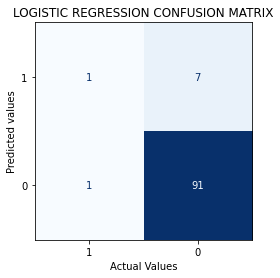

In [23]:
cmdisplay=ConfusionMatrixDisplay(confusion_matrix=lr_matrix,display_labels=['1','0'])
cmdisplay.plot(cmap=plt.cm.Blues,colorbar=False)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX")
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.show()

<h3>NAIVE BAYES</h3>

In [24]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)
nb_matrix=confusion_matrix(y_test,nb_predict)
print("CONFUSION MATRIX\n")
print(nb_matrix)
print("Accuracy Score",accuracy_score(y_test,nb_predict)*100)
print("Classsification Report")
print(classification_report(y_test,nb_predict))

CONFUSION MATRIX

[[ 7  1]
 [12 80]]
Accuracy Score 87.0
Classsification Report
              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.99      0.87      0.92        92

    accuracy                           0.87       100
   macro avg       0.68      0.87      0.72       100
weighted avg       0.94      0.87      0.89       100



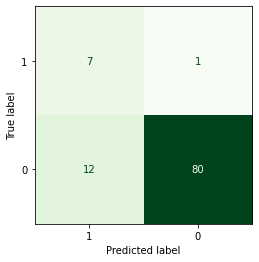

In [25]:
nb_display=ConfusionMatrixDisplay(confusion_matrix=nb_matrix,display_labels=['1','0'])
nb_display.plot(cmap=plt.cm.Greens,colorbar=False)

<h3>RANDOM FOREST CLASSIFIER</h3>

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict=nb.predict(x_test)
rf_matrix=confusion_matrix(y_test,rf_predict)
print("CONFUSION MATRIX\n")
print(rf_matrix)
print("Accuracy Score",accuracy_score(y_test,rf_predict)*100)
print("Classsification Report")
print(classification_report(y_test,rf_predict))

CONFUSION MATRIX

[[ 7  1]
 [12 80]]
Accuracy Score 87.0
Classsification Report
              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.99      0.87      0.92        92

    accuracy                           0.87       100
   macro avg       0.68      0.87      0.72       100
weighted avg       0.94      0.87      0.89       100



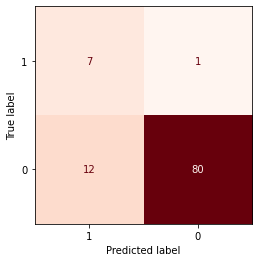

In [27]:
rf_display=ConfusionMatrixDisplay(confusion_matrix=rf_matrix,display_labels=['1','0'])
rf_display.plot(cmap=plt.cm.Reds,colorbar=False)

<h3>DECISION TREE CLASSIFIER</h3>

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict=nb.predict(x_test)
dt_matrix=confusion_matrix(y_test,dt_predict)
print("CONFUSION MATRIX\n")
print(dt_matrix)
print("Accuracy Score",accuracy_score(y_test,dt_predict)*100)
print("Classsification Report")
print(classification_report(y_test,dt_predict))

CONFUSION MATRIX

[[ 7  1]
 [12 80]]
Accuracy Score 87.0
Classsification Report
              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.99      0.87      0.92        92

    accuracy                           0.87       100
   macro avg       0.68      0.87      0.72       100
weighted avg       0.94      0.87      0.89       100



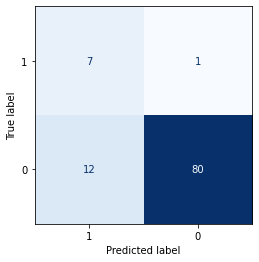

In [31]:
dt_display=ConfusionMatrixDisplay(confusion_matrix=dt_matrix,display_labels=['1','0'])
dt_display.plot(cmap=plt.cm.Blues,colorbar=False)

<h3>KNEIGHBORS CLASSIFIER</h3>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_predict=kn.predict(x_test)
kn_matrix=confusion_matrix(y_test,kn_predict)
print("CONFUSION MATRIX\n")
print(kn_matrix)
print("Accuracy Score",accuracy_score(y_test,kn_predict)*100)
print("Classsification Report")
print(classification_report(y_test,kn_predict))

CONFUSION MATRIX

[[ 2  6]
 [ 0 92]]
Accuracy Score 94.0
Classsification Report
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.94      1.00      0.97        92

    accuracy                           0.94       100
   macro avg       0.97      0.62      0.68       100
weighted avg       0.94      0.94      0.92       100



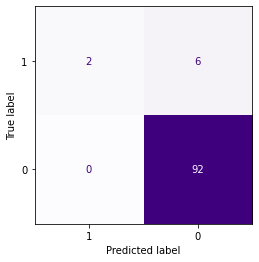

In [32]:
kn_display=ConfusionMatrixDisplay(confusion_matrix=kn_matrix,display_labels=['1','0'])
kn_display.plot(cmap=plt.cm.Purples,colorbar=False)

<h3>SUPPORT VECTOR</h3>

In [33]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
sv_predict=nb.predict(x_test)
sv_matrix=confusion_matrix(y_test,sv_predict)
print("CONFUSION MATRIX\n")
print(sv_matrix)
print("Accuracy Score",accuracy_score(y_test,sv_predict)*100)
print("Classsification Report")
print(classification_report(y_test,sv_predict))

CONFUSION MATRIX

[[ 7  1]
 [12 80]]
Accuracy Score 87.0
Classsification Report
              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.99      0.87      0.92        92

    accuracy                           0.87       100
   macro avg       0.68      0.87      0.72       100
weighted avg       0.94      0.87      0.89       100



In [ ]:
sv_display=ConfusionMatrixDisplay(confusion_matrix=sv_matrix,display_labels=['1','0'])
sv_display.plot(cmap=plt.cm.Purples,colorbar=False)

<h3>XGBClassifier</h3>

In [36]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_predict=xgb.predict(x_test)

xgb_matrix=confusion_matrix(y_test,xgb_predict)
print("Confusion Matrix")
print(xgb_matrix)
print("Accuray Score",accuracy_score(y_test,xgb_predict)*100)
print("Classification Report")
print(classification_report(y_test,xgb_predict))

Confusion Matrix
[[ 4  4]
 [ 2 90]]
Accuray Score 94.0
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.96      0.98      0.97        92

    accuracy                           0.94       100
   macro avg       0.81      0.74      0.77       100
weighted avg       0.93      0.94      0.94       100



In [ ]:
xgb_display=ConfusionMatrixDisplay(confusion_matrix=xgb_matrix,display_labels=['1','0'])
xgb_display.plot(cmap=plt.cm.Reds,colorbar=False)

<h3>STACKINGCVCLASSIFIER</h3>

In [38]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,dt,sv],meta_classifier= sv,random_state=42)
scv.fit(x_train,y_train)
scv_predict=scv.predict(x_test)
scv_matrix=confusion_matrix(y_test,scv_predict)
print("Confusion Matrix\n")
print(scv_matrix)
print("Accuracy Score",accuracy_score(y_test,scv_predict)*100)
print("Classification Report")
print(classification_report(y_test,scv_predict))

Confusion Matrix

[[ 4  4]
 [ 2 90]]
Accuracy Score 94.0
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.96      0.98      0.97        92

    accuracy                           0.94       100
   macro avg       0.81      0.74      0.77       100
weighted avg       0.93      0.94      0.94       100



Model Evaluation
                       Model  Accuracy
0        Logistic Regression      92.0
1                Naive Bayes      87.0
2              Random forest      87.0
3              Decision Tree      87.0
4                  KNeighbor      87.0
5            Support Machine      94.0
6         xgb Classification      94.0
7  StackingCv Classification      94.0


<BarContainer object of 8 artists>

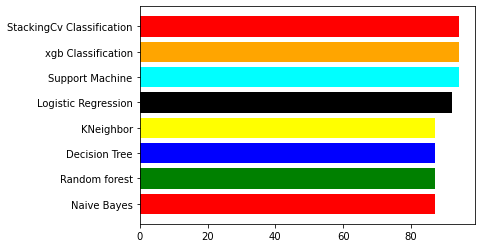

In [39]:
model_evaluation=pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','Random forest','Decision Tree','KNeighbor','Support Machine','xgb Classification','StackingCv Classification'],
                               'Accuracy':[accuracy_score(y_test,lr_predict)*100,accuracy_score(y_test,nb_predict)*100,accuracy_score(y_test,rf_predict)*100,accuracy_score(y_test,dt_predict)*100,accuracy_score(y_test,sv_predict)*100,accuracy_score(y_test,kn_predict)*100,accuracy_score(y_test,xgb_predict)*100, accuracy_score(y_test,scv_predict)*100]})
print("Model Evaluation")
print(model_evaluation)
model=model_evaluation.sort_values(by="Accuracy")
c = ['red','green','blue','yellow', 'black', 'cyan', 'orange']
plt.barh(model['Model'],model['Accuracy'],color = c)

<h3>IMPORTANT FEATURE</h3>

In [ ]:
df1 = pd.DataFrame({'Feature':['Serial No.','GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA'],'Importance': xgb.feature_importances_})
df_sorted=df1.sort_values(by='Importance',ascending=False)
print(df_sorted)
plt.figure(figsize=(10,6))
plt.title("barplot Representation feature importance")
plt.xlabel("Importance ")
plt.ylabel("Features")
c = ['red','green','blue','yellow', 'black', 'cyan', 'orange']
plt.barh(df_sorted['Feature'],df_sorted['Importance'],color = c)
plt.show()

<h1> ROC CURVE</h1>

In [ ]:
lr_fp,lr_tp,lr_thre=roc_curve(y_test,lr_predict)
nb_fp,nb_tp,nb_thre=roc_curve(y_test,nb_predict)
rf_fp,rf_tp,nb_thre=roc_curve(y_test,rf_predict)
dt_fp,dt_tp,dt_thre=roc_curve(y_test,dt_predict)
kn_fp,kn_tp,kn_thre=roc_curve(y_test,kn_predict)
sv_fp,sv_tp,sv_thre=roc_curve(y_test,sv_predict)
xgb_fp,xgb_tp,xgb_thre=roc_curve(y_test,xgb_predict)
scv_fp,scv_tp,scv_thre=roc_curve(y_test,scv_predict)
sns.set_style("whitegrid")
plt.title("Recevier operating characteristics")
plt.plot(lr_fp,lr_tp,label="Logestic regression",color='blue')
plt.plot(nb_fp,nb_tp,label="Naive bayes",color="yellow")
plt.plot(rf_fp,rf_tp,label="Random Forest",color='green')
plt.plot(dt_fp,dt_tp,label="Decision Tree",color='black')
plt.plot(kn_fp,kn_tp,label="Kneigbhor",color="purple")
plt.plot(sv_fp,sv_tp,label="support vector machine",color='orange')
plt.plot(xgb_fp,xgb_tp,label="XGBoost Classifier",color='cyan')
plt.plot(scv_fp,scv_tp,label="Stackcv Classifier",color='magenta')
plt.plot([0,1],ls='-.')
plt.plot([0,0],[1,0],c='.8')
plt.plot([1,1],c='.8')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
x_train_data=lr.predict(x_train)
training_accuracy_score=accuracy_score(y_train,x_train_data)
print("Accuracy on training data:",training_accuracy_score)

In [ ]:
x_test_data=lr.predict(x_test)
test_accuracy_score=accuracy_score(y_test,x_test_data)
print("Accuracy on testing data:",test_accuracy_score)

<h2>Buliding a Predictive System</h2>

In [ ]:
input_data=np.array([332,108,5,4.5,4.0,9.02,1])
input_data1=input_data.reshape(1,-1)
prediction=lr.predict(input_data1)
print(prediction)
if(prediction[0]==1):
    print("The person has higher chance")
else:
    print("The person has less chance")


<h3>Saving the Trained Model</h3>

In [ ]:
import pickle
filename="Admission_model.sav"
pickle.dump(lr,open(filename,'wb'))
#loading the saved model
loaded_model=pickle.load(open("Admission_model.sav",'rb'))

In [ ]:
input_data=np.array([332,108,5,4.5,4.0,9.02,1])
input_data1=input_data.reshape(1,-1)
prediction=lr.predict(input_data1)
print(prediction)
if(prediction[0]==1):
    print("The person has higher chance")
else:
    print("The person has less chance")
